In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [2]:
ds = fetch_openml("mnist_784")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(ds.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
ds.data.shape

(70000, 784)

In [6]:
np.set_printoptions(linewidth=160)
ds.data.iloc[60].values.reshape(28, 28).astype('int')

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,  21,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  71, 235, 213,   5,   0,   0,   0,   0,   0,   0,  88, 248

In [7]:
ds.target[60]

'4'

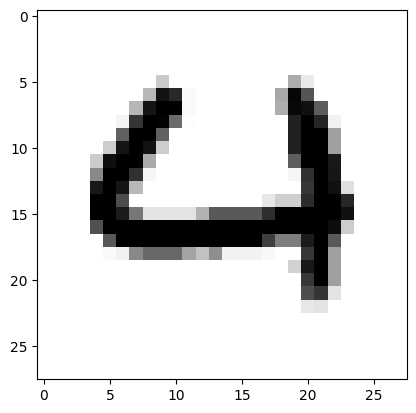

In [8]:
plt.imshow( ds.data.iloc[60].values.reshape(28, 28).astype('int'), cmap='gray_r' )

In [9]:
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size=0.2, random_state=0)

In [10]:
X_train.shape

(56000, 784)

In [11]:
%%time
model = KNeighborsClassifier(7)
model.fit(X_train, y_train)

CPU times: user 210 ms, sys: 101 ms, total: 311 ms
Wall time: 315 ms


KNeighborsClassifier(n_neighbors=7)

In [12]:
y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,1377,0,2,0,0,2,6,0,0,0
1,0,1577,2,0,0,0,0,1,0,0
2,11,14,1382,5,3,0,2,18,7,1
3,1,4,13,1376,1,13,0,8,14,5
4,2,7,0,0,1305,0,2,4,0,30
5,4,4,2,11,1,1185,15,2,1,6
6,6,2,2,0,5,8,1363,0,1,0
7,1,19,6,0,2,0,0,1414,1,15
8,1,21,2,17,5,20,4,3,1277,18
9,2,0,1,14,10,2,1,13,4,1314


In [13]:
model.score(X_test, y_test)

0.9692857142857143

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.0.2'